2. Perform  polynomial regression of degree 3 on the given train dataset. Predict the mean square error for the test data set with the obtained model (use constant learning rate) also print the final weights.

   a)Without regularization

   b)With regularization

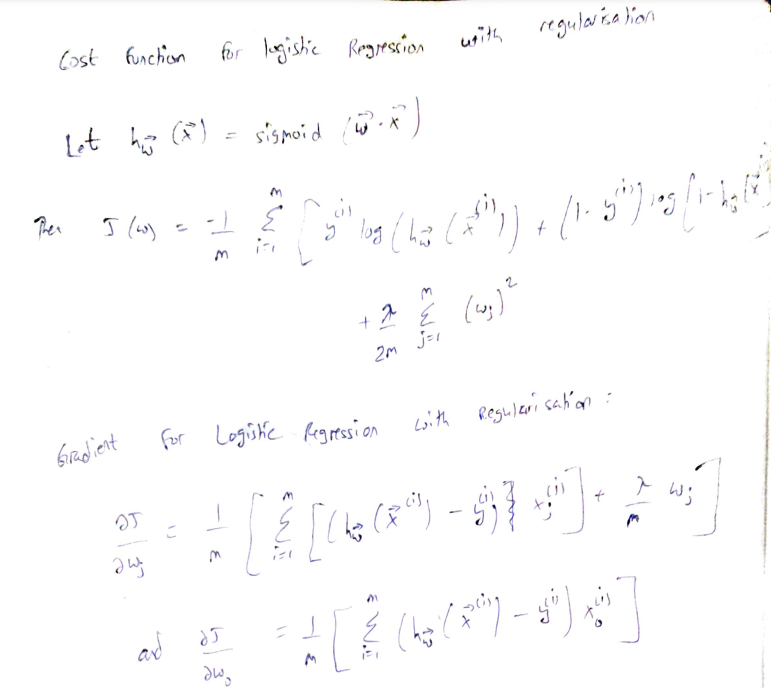

a) Without Regularization

In [442]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("Train_dataset.csv")
df=df.fillna(0)
X=df.drop('y',axis=1)
X=X/X.max()
y=df['y']



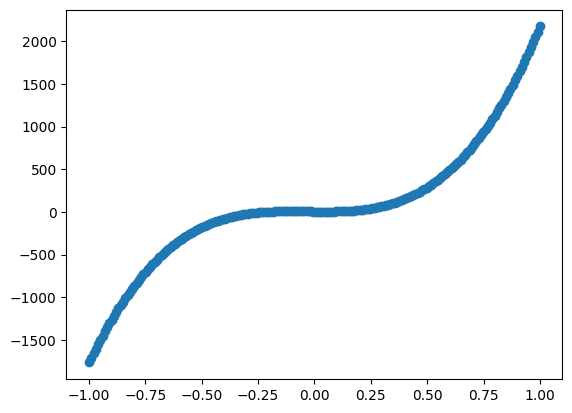

In [443]:
plt.scatter(X['x'],y)
plt.show()

In [444]:
X['x^2']=X['x']**2
X['x^3']=X['x']**3
n=X.shape[0]

In [445]:
X=pd.concat([pd.Series(1,index=X.index,name='x^0'),X],axis=1)

In [446]:
# cost function
def cost(X,y,w):
    tobesummed = np.power((np.sum((X*w),axis=1)-y),2)
    return np.sum(tobesummed)/(2 * len(X))
    




In [447]:
#gradient descent

def gradientDescent(X,y,w,n,alpha):
    i=[]
    k=0
    while k<n:
        h0=np.sum((X*w),axis=1)
        for c in range(0,len(X.columns)):
            w[c]=w[c]-(alpha/len(X))*(np.sum((h0-y)*X.iloc[:,c]))
        j=cost(X,y,w)
        i.append(j)
        k+=1
    return i,w

In [448]:
w=np.array([1]*len(X.columns))
i,w=gradientDescent(X,y,w,10000,1.5)
print("The final weights are ",w)



The final weights are  [   6   -2  194 1957]


In [449]:
finalcost=cost(X,y,w)
print(finalcost)

24.03599405133288


In [450]:
df3=pd.read_csv("Test_dataset.csv")
df3=df3.fillna(0)
X1=df3.drop('y',axis=1)
X1=X1/X1.max()
y1=df3['y']
X1['x^2']=X1['x']**2
X1['x^3']=X1['x']**3
X1=pd.concat([pd.Series(1,index=X1.index,name='x^0'),X1],axis=1)


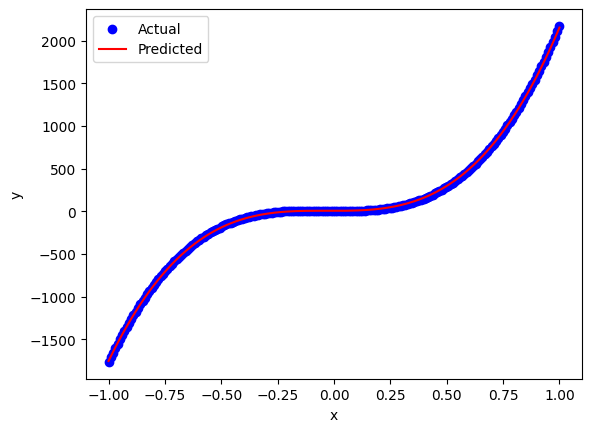

In [451]:
y_pred=np.sum((X*w),axis=1)
plt.scatter(X['x'],y,color='blue',label='Actual')
plt.plot(X['x'],y_pred,color='red',label='Predicted')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Checking with test data

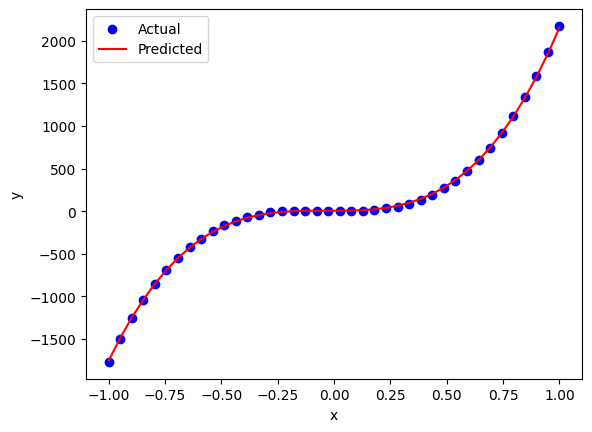

In [452]:
y1_pred=np.sum((X1*w),axis=1)
plt.scatter(X1['x'],y1,color='blue',label='Actual')
plt.plot(X1['x'],y1_pred,color='red',label='Predicted')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [453]:
def MSE(X,y,w):
    tobesummed = np.power((np.sum((X*w),axis=1)-y),2)
    return np.sum(tobesummed)/(len(X))
print("The MSE is ",MSE(X1,y1,w))

The MSE is  60.09058577289223


# With regularisation

In [464]:
w1=np.array([1]*len(X.columns))
def regularisation(X,y,w,alpha=1,lambda_val=0.2,n=10000):
    cost_lis=[]
    for i in range(n):
        y_estimated = np.dot(X,w)
        error = y_estimated - y
        reg_term = (lambda_val / 2 * np.shape(X)[0]) * np.sum(np.square(w))
        cost = (1 / 2 * np.shape(X)[0]) * np.sum(error ** 2) + reg_term
        gradient = (1 / np.shape(X)[0]) * (X.T.dot(error) + (lambda_val * w))
        w = w - alpha * gradient
        cost_lis.append(cost)
    return w,cost_lis




In [465]:
w_new,cos_lis=regularisation(X,y,w1,1,0.2,10000)

In [466]:
print("The new weights are ", w_new)


The new weights are  x^0       4.723928
x        19.034616
x^2     197.835795
x^3    1918.992829
dtype: float64


Checking with test data

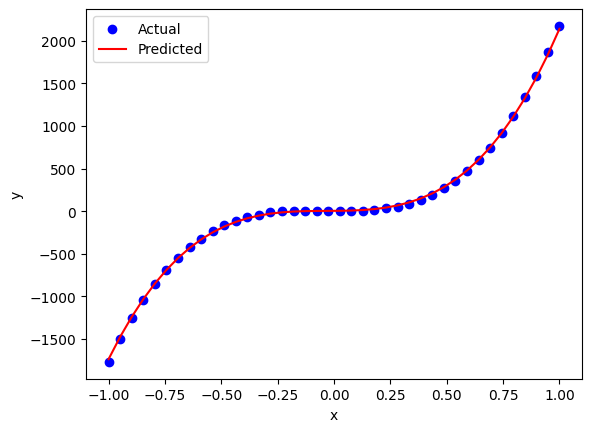

In [467]:
y2_pred=np.sum((X1*w_new),axis=1)
plt.scatter(X1['x'],y1,color='blue',label='Actual')
plt.plot(X1['x'],y2_pred,color='red',label='Predicted')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [469]:
print("The new MSE is ",MSE(X1,y1,w_new))

The new MSE is  189.19278759117665
